In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
html = requests.request("GET", 'https://www.imdb.com/chart/top/?ref_=nv_mv_250').text

In [5]:
soup = BeautifulSoup(html, 'html.parser')
total = soup.find('tbody', attrs={'class':'lister-list'})

In [6]:
import pandas as pd
scrapped_data = []
for item in total.find_all('tr'):
    title = item.find('td', attrs={'class':'titleColumn'}).find('a')
    year = item.find('span', attrs={'class':'secondaryInfo'})
    rating = item.find('td', attrs={'class':'ratingColumn imdbRating'}).find('strong')
    image = item.find('td', attrs={'class':'posterColumn'}).find('img')['src']
    
    list_data = {}
    list_data['title'] = title.text
    list_data['year'] = int(year.text[1:-1])
    list_data['rating'] = float(rating.text)
    list_data['image'] = image
    
    scrapped_data.append(list_data)

dframe = pd.DataFrame.from_dict(scrapped_data)
dframe.to_csv('dataFilm.csv', index=False)

In [7]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   250 non-null    object 
 1   year    250 non-null    int64  
 2   rating  250 non-null    float64
 3   image   250 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ KB


In [8]:
dframe.head() # sorted by rating

,title,year,rating,image
0,The Shawshank Redemption,1994,9.2,https://m.media-amazon.com/images/M/MV5BMDFkYT...
1,The Godfather,1972,9.1,https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,The Godfather: Part II,1974,9.0,https://m.media-amazon.com/images/M/MV5BMWMwMG...
3,The Dark Knight,2008,9.0,https://m.media-amazon.com/images/M/MV5BMTMxNT...
4,12 Angry Men,1957,8.9,https://m.media-amazon.com/images/M/MV5BMWU4N2...


<AxesSubplot:xlabel='year', ylabel='rating'>

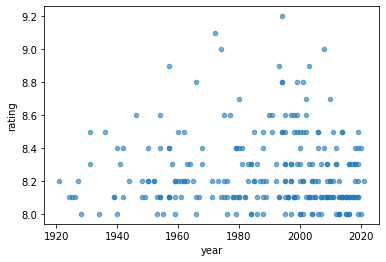

In [9]:
dframe.plot(kind='scatter', x='year', y='rating', alpha=.6)

<AxesSubplot:ylabel='year'>

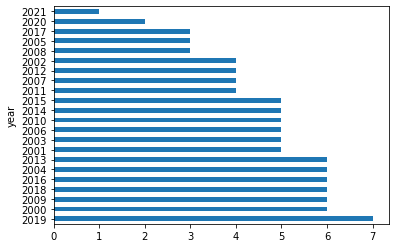

In [10]:
# film tahun 2019 memilki jumlah terbanyak yang menduduki 250 film dengan rating terbaik dalam range (2000-2021)
dframe.loc[dframe.year >= 2000 ].value_counts('year').plot(kind='barh')